In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io

In [12]:
data = pd.read_csv('movie_metadata.csv')
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [13]:
print(data.shape)

(5043, 28)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [15]:
round(100*(data.isnull().sum()/len(data.index)), #checking for missing values percentage

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [19]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]


In [24]:
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        4
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                24
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               41
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 67
movie_facebook_likes          0
dtype: int64

In [25]:
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        4
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                24
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               41
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 67
movie_facebook_likes          0
dtype: int64

In [199]:
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

In [46]:
data.isnull().sum().sum() #we have zero null values

0

In [47]:
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [210]:
data['Profit'] = data['gross'] - data['budget']
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [50]:
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3879


In [51]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)


print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows After Removing Duplicates:  3845


In [52]:
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [56]:
data['language'].value_counts()

English          3664
French             37
Spanish            25
Mandarin           14
German             13
Japanese           12
Hindi              10
Cantonese           8
Italian             7
Portuguese          5
Korean              5
Norwegian           4
Unknown Actor       3
Dutch               3
Persian             3
Thai                3
Danish              3
Aboriginal          2
Dari                2
Indonesian          2
Hebrew              2
Zulu                1
Vietnamese          1
Dzongkha            1
Arabic              1
Russian             1
Romanian            1
None                1
Aramaic             1
Czech               1
Telugu              1
Icelandic           1
Filipino            1
Hungarian           1
Maya                1
Bosnian             1
Mongolian           1
Kazakh              1
Swedish             1
Name: language, dtype: int64

In [60]:
def language(x):
    if  x == 'English':
        return 'English'
        

    else:
        return 'Foreign'

data['language'] = data['language'].apply(language) # lets apply the function on the language column
# lets check the values again
data['language'].value_counts()


English    3664
Foreign     181
Name: language, dtype: int64

In [67]:
def duration(x):
    if x <=120:
        return 'short'
    else:
        return 'Long'
    
data['duration'] = data['duration'].apply(duration)#applying this function on duration column
data['duration'].value_counts()

short    2928
Long      917
Name: duration, dtype: int64

In [68]:
data['genres'].value_counts()

Drama                                      153
Comedy|Drama|Romance                       151
Comedy|Drama                               146
Comedy                                     145
Comedy|Romance                             136
                                          ... 
Adventure|Comedy|Sci-Fi|Western              1
Action|Biography|Drama|Thriller|War          1
Action|Fantasy|Western                       1
Action|Adventure|Family|Fantasy|Romance      1
Comedy|Crime|Horror                          1
Name: genres, Length: 760, dtype: int64

In [194]:
X= data['genres'].str.split('|')[0]
X

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [70]:
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])
# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])
# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


C:\Users\vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


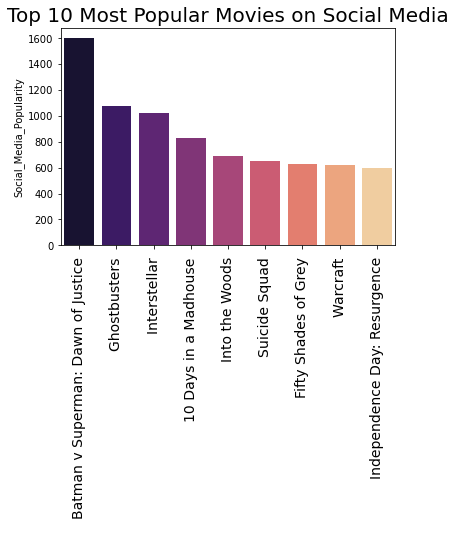

In [73]:
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
data['num_voted_users'])*data['movie_facebook_likes']
# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
ascending = False).head(10).reset_index()
print(x)
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

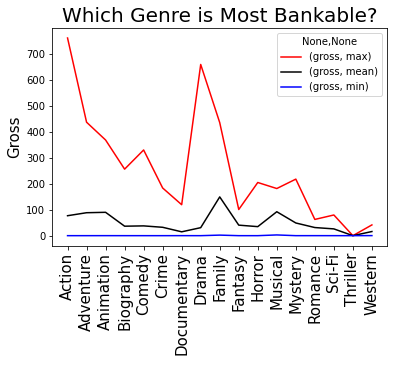

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [74]:
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()
print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
'movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most Profitable Years in Box Office


C:\Users\vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


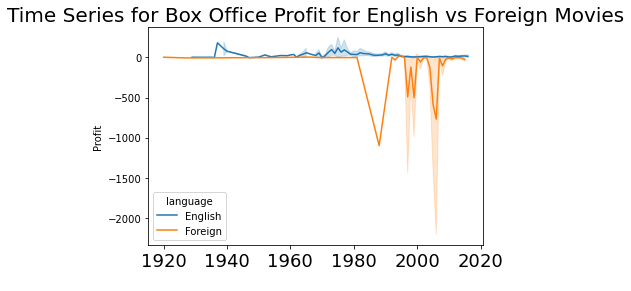

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [75]:
data['title_year'] = data['title_year'].astype('int')
print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
'title_year']).agg('sum').sort_values(by = 'Profit',
ascending = False).head(10).style.background_gradient(cmap = 'Greens'))
# lets plot them
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()
print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
'language','Profit']].style.background_gradient(cmap = 'Reds'))

In [214]:
data.corr()

,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,Social_Media_Popularity
director_facebook_likes,1.000000,0.092272,0.143138,0.304679,0.122252,0.221857,0.019047,-0.046174,0.119973,0.190570,0.163041,0.024926,0.094076
actor_1_facebook_likes,0.092272,1.000000,0.147000,0.181734,0.946460,0.126536,0.017037,0.091856,0.391214,0.091587,0.129847,0.028081,0.079150
gross,0.143138,0.147000,1.000000,0.628820,0.232634,0.552884,0.100755,0.046841,0.247441,0.213554,0.367057,0.205921,0.269200
num_voted_users,0.304679,0.181734,0.628820,1.000000,0.248187,0.782483,0.068027,0.018433,0.242936,0.474894,0.519684,0.124893,0.314749
cast_total_facebook_likes,0.122252,0.946460,0.232634,0.248187,1.000000,0.182294,0.028941,0.121290,0.640287,0.104012,0.200873,0.042493,0.128776
num_user_for_reviews,0.221857,0.126536,0.552884,0.782483,0.182294,1.000000,0.072939,0.014511,0.189958,0.321573,0.374685,0.096900,0.353088
budget,0.019047,0.017037,0.100755,0.068027,0.028941,0.072939,1.000000,0.044779,0.035804,0.029795,0.053145,-0.952842,0.049645
title_year,-0.046174,0.091856,0.046841,0.018433,0.121290,0.014511,0.044779,1.000000,0.117496,-0.129306,0.295301,-0.029756,0.270343
actor_2_facebook_likes,0.119973,0.391214,0.247441,0.242936,0.640287,0.189958,0.035804,0.117496,1.000000,0.100020,0.227003,0.040259,0.149571
imdb_score,0.190570,0.091587,0.213554,0.474894,0.104012,0.321573,0.029795,-0.129306,0.100020,1.000000,0.280806,0.035833,0.153563


,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit


C:\Users\vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gross Comparison')

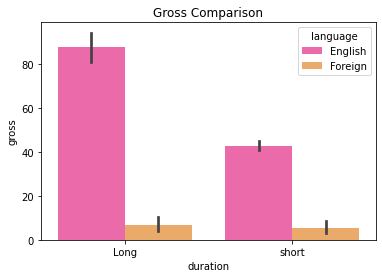

In [83]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

C:\Users\vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


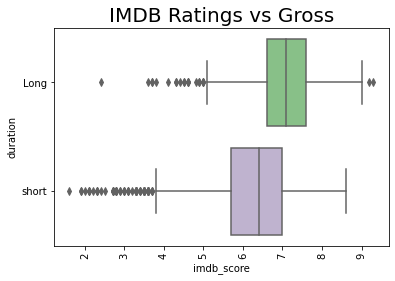

In [184]:
sns.boxplot(data['imdb_score'], data['duration'], palette = "Accent")
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#recommeding movies based on actor

In [341]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x] 
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    

    return a.head(15)
recommend_movies_on_actors(str(input('Enter the actor name: ')))

Enter the actor name: Chris Hemsworth


,movie_title,imdb_score
17,The Avengers,8.1
1373,Rush,8.1
160,Star Trek,8.0
8,Avengers: Age of Ultron,7.5
127,Thor: The Dark World,7.1
130,Thor,7.0
320,In the Heart of the Sea,7.0
1653,The Cabin in the Woods,7.0
2789,A Perfect Getaway,6.5
81,Snow White and the Huntsman,6.1


In [115]:
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)
# lets check the head of x
x.head()

  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [116]:
genres = x.astype('int') #converting data from bool to int
genres.head() 

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#creating recommendation engine for getting similar genre 

In [342]:
def recommendation_genres(gen):
    gen = genres[gen] 
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    
    
    return similar_genres.head(3)
recommendation_genres(str(input("Enter the genre: ")))

Enter the genre: Action


Adventure    0.321034
Thriller     0.304155
Sci-Fi       0.295371
dtype: float64